In [1]:
import pandas as pd
import numpy as np
import keras

from sklearn.model_selection import train_test_split
#i#mport imblearn
#from imblearn.over_sampling import SMOTE
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Input
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import keras_tuner as k
from hyperopt import fmin, tpe, Trials
from keras import Sequential
from keras.layers import Dense
#pip install keras-tuner --upgrade
#pip install hyperopt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from mlxtend.plotting  import plot_decision_regions 

Using TensorFlow backend


In [2]:
df=pd.read_csv("8.twospirals.csv",header=None)

In [3]:
df.head()

,0,1,2
0,-2.543456,-10.816358,0
1,9.434466,-2.572000,0
2,3.368646,-10.194671,0
3,1.341407,-4.204140,0
4,9.547758,-2.220580,0


In [4]:
df.shape

(2000, 3)

In [5]:
df.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
x=df.iloc[0:,:2]

In [8]:
y=df.iloc[0:,2]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10)

In [10]:
x_train.value_counts().sum()

1800

In [11]:
y_train.value_counts()

1    907
0    893
Name: 2, dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_trainp = std.fit_transform(x_train)
x_testp = std.transform(x_test)

In [13]:
trials = Trials()

In [14]:
from keras.regularizers import L1,L2,L1L2

In [33]:
def modellss(hp):
    model=Sequential()
    model.add(Input(shape=(2,)))
    
    for i in range(hp.Int("hiddenlayers",min_value=5,max_value=10)):
                model.add(Dense(units=hp.Int("neurons{}".format(i),min_value=5,max_value=25),activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),kernel_initializer="he_normal"))

                    
                
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['accuracy'])
    return model

In [34]:
tuner=k.RandomSearch(modellss,objective="val_accuracy",max_trials=25,directory="C:\\Users\\admin\\main\\folder8",project_name="f2")

In [35]:
tuner.search(x_trainp,y_train,epochs=30,validation_data=(x_test,y_test))

Trial 25 Complete [00h 00m 08s]
val_accuracy: 0.7300000190734863

Best val_accuracy So Far: 0.7450000047683716
Total elapsed time: 00h 03m 57s


In [36]:
tuner.results_summary()


Results summary
Results in C:\Users\admin\main\folder8\f2
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 05 summary
Hyperparameters:
hiddenlayers: 7
neurons0: 23
neurons1: 10
neurons2: 11
neurons3: 11
neurons4: 12
neurons5: 7
neurons6: 17
neurons7: 6
neurons8: 24
Score: 0.7450000047683716

Trial 16 summary
Hyperparameters:
hiddenlayers: 9
neurons0: 19
neurons1: 5
neurons2: 18
neurons3: 11
neurons4: 25
neurons5: 9
neurons6: 14
neurons7: 25
neurons8: 21
neurons9: 12
Score: 0.7400000095367432

Trial 11 summary
Hyperparameters:
hiddenlayers: 8
neurons0: 9
neurons1: 18
neurons2: 20
neurons3: 16
neurons4: 6
neurons5: 10
neurons6: 21
neurons7: 24
neurons8: 18
neurons9: 6
Score: 0.7300000190734863

Trial 19 summary
Hyperparameters:
hiddenlayers: 7
neurons0: 12
neurons1: 12
neurons2: 18
neurons3: 17
neurons4: 22
neurons5: 15
neurons6: 15
neurons7: 6
neurons8: 15
neurons9: 15
Score: 0.7300000190734863

Trial 24 summary
Hyperparameters:
hiddenlayers: 8
neurons0: 12


In [37]:
tuner.get_best_hyperparameters()[0].values

{'hiddenlayers': 7,
 'neurons0': 23,
 'neurons1': 10,
 'neurons2': 11,
 'neurons3': 11,
 'neurons4': 12,
 'neurons5': 7,
 'neurons6': 17,
 'neurons7': 6,
 'neurons8': 24}

In [38]:
fmodel = tuner.get_best_models(num_models=1)[0]

In [39]:
fmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 23)                69        
                                                                 
 dense_1 (Dense)             (None, 10)                240       
                                                                 
 dense_2 (Dense)             (None, 11)                121       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 12)                144       
                                                                 
 dense_5 (Dense)             (None, 7)                 91        
                                                                 
 dense_6 (Dense)             (None, 17)                1

In [40]:
history=fmodel.fit(x_trainp,y_train,batch_size=10,epochs=30,validation_split=0.1)

Epoch 1/30
162/162 [==============================] - 2s 4ms/step - loss: 0.7398 - accuracy: 0.6123 - val_loss: 0.7380 - val_accuracy: 0.5944
Epoch 2/30
162/162 [==============================] - 0s 2ms/step - loss: 0.7120 - accuracy: 0.6333 - val_loss: 0.6889 - val_accuracy: 0.6611
Epoch 3/30
162/162 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.6710 - val_loss: 0.6870 - val_accuracy: 0.6556
Epoch 4/30
162/162 [==============================] - 0s 2ms/step - loss: 0.6024 - accuracy: 0.7593 - val_loss: 0.5705 - val_accuracy: 0.8111
Epoch 5/30
162/162 [==============================] - 0s 2ms/step - loss: 0.5421 - accuracy: 0.8370 - val_loss: 0.5207 - val_accuracy: 0.8389
Epoch 6/30
162/162 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.8543 - val_loss: 0.4597 - val_accuracy: 0.8500
Epoch 7/30
162/162 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.9062 - val_loss: 0.3768 - val_accuracy: 0.9389
Epoch 

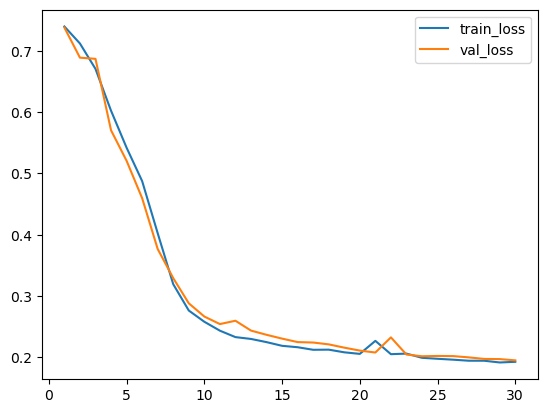

In [41]:
plt.plot(range(1,31),history.history["loss"],label="train_loss")
plt.plot(range(1,31),history.history["val_loss"],label="val_loss")
plt.legend()

In [42]:
history.history['val_loss']

[0.738024115562439,
 0.6888952255249023,
 0.6869847774505615,
 0.5704503655433655,
 0.5206899046897888,
 0.45972582697868347,
 0.3768114447593689,
 0.3292681872844696,
 0.28820979595184326,
 0.2666568458080292,
 0.2543300986289978,
 0.2597810924053192,
 0.24371828138828278,
 0.23683616518974304,
 0.23060868680477142,
 0.22495178878307343,
 0.22421857714653015,
 0.22122634947299957,
 0.2158738523721695,
 0.21107953786849976,
 0.20793117582798004,
 0.2326299250125885,
 0.2046228051185608,
 0.20181089639663696,
 0.2023196965456009,
 0.20208045840263367,
 0.2000175267457962,
 0.19747000932693481,
 0.19720236957073212,
 0.19511859118938446]

In [43]:
predicted=fmodel.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [44]:
predicted=np.where(predicted>0.5,1,0)

In [45]:
accuracy_score(y_test,predicted)

0.66

In [46]:
confusion_matrix(y_test,predicted)

array([[82, 25],
       [43, 50]], dtype=int64)

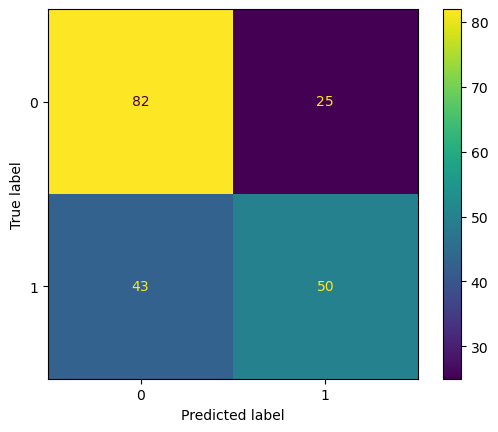

In [47]:

cm = confusion_matrix(y_test,predicted)
va = ConfusionMatrixDisplay(cm)
va.plot()
plt.show()

9600/9600 [==============================] - 17s 2ms/step


<AxesSubplot:>

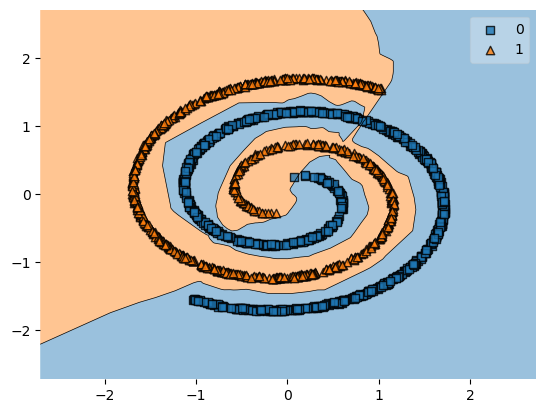

In [48]:
y_train_int = y_train.values.astype(int)
plot_decision_regions(x_trainp, y_train_int, clf=fmodel)

In [49]:
y_test_int = y_test.values.astype(int)

9600/9600 [==============================] - 15s 2ms/step


<AxesSubplot:>

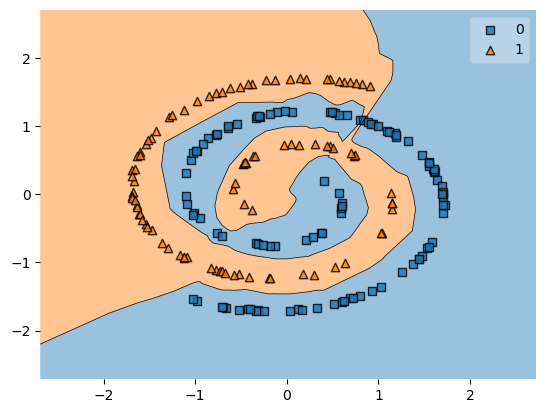

In [50]:

plot_decision_regions(x_testp,y_test_int,clf=fmodel)